<a href="https://colab.research.google.com/github/celestiegladys/Machine_learning_2/blob/main/EEG_heel_strike_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving conti_walking.xdf to conti_walking.xdf


In [ ]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()

Saving cont_walking_2.xdf to cont_walking_2.xdf


Saving Heel_strike_location_tests.mat to Heel_strike_location_tests.mat


In [ ]:
uploaded = files.upload()

Saving eeg_index.mat to eeg_index.mat


In [ ]:
!pip install pyxdf
!pip install scipy pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pyxdf
import numpy as np
import pandas as pd
import scipy.io



# Load the XDF file
data, header = pyxdf.load_xdf('/content/conti_walking.xdf/')
data2, header2 = pyxdf.load_xdf('/content/cont_walking_2.xdf/')
#Load the mat file
eeg_index_test = scipy.io.loadmat('/content/eeg_index.mat')
heel_strike_test = scipy.io.loadmat('/content/Heel_strike_location_tests.mat')
heel_strike_test =heel_strike_test['heel_strike_locations']
eeg_index_test =eeg_index_test['index']



**XDF to CSV**

In [ ]:
df = pd.DataFrame(eeg_index_test)
df.to_csv('eeg_index_test.csv', index=False)
df = pd.DataFrame(heel_strike_test)
df.to_csv('heel_strike_test.csv', index=False)
heel_strike_test = heel_strike_test.flatten()



**EXTRACTING EEG DATA AND TIMESTAMPS**


In [ ]:
#EXTRACTING EEGdata
for stream in data:
    if stream['info']['type'][0] == 'EEG':
        eeg_data = np.array(stream['time_series'])
        eeg_timestamps = np.array(stream['time_stamps'])
        print(f"EEG data shape: {eeg_data.shape}, timestamps shape: {eeg_timestamps.shape}")
#extracting eeg data for validation
for stream in data2:
    if stream['info']['type'][0] == 'EEG':
        eeg_data_test = np.array(stream['time_series'])
        eeg_timestamps_test = np.array(stream['time_stamps'])
        print(f"EEG test data shape: {eeg_data_test.shape}, timestamps shape: {eeg_timestamps_test.shape}")
#extracting IMU data
for stream in data:
    if stream['info']['type'][0] == 'Orientation':
        imu_data = np.array(stream['time_series'])
        imu_timestamps = np.array(stream['time_stamps'])
        print(f"IMU data shape: {imu_data.shape}, timestamps shape: {imu_timestamps.shape}")
#extracting IMU data for validation
for stream in data2:
    if stream['info']['type'][0] == 'Orientation':
        imu_data_test = np.array(stream['time_series'])
        imu_timestamps_test = np.array(stream['time_stamps'])
        print(f"IMU test data shape: {imu_data_test.shape}, timestamps shape: {imu_timestamps_test.shape}")



# Save eeg_data as CSV
#pd.DataFrame(eeg_data).to_csv('eeg_data.csv', index=False)
#pd.DataFrame(eeg_data_test).to_csv('eeg_data_test.csv', index=False)
# Save imu_data as CSV
#pd.DataFrame(imu_data).to_csv('imu_data.csv', index=False)
#pd.DataFrame(imu_data_test).to_csv('imu_data_test.csv', index=False)


EEG data shape: (29984, 8), timestamps shape: (29984,)
EEG test data shape: (19232, 8), timestamps shape: (19232,)
IMU data shape: (3572, 3), timestamps shape: (3572,)
IMU test data shape: (2359, 3), timestamps shape: (2359,)


**EEG TEST DATA**

In [ ]:
eeg_data_test=pd.DataFrame( eeg_data_test)
eeg_data_test

,0,1,2,3,4,5,6,7
0,129.625259,129.595444,127.611740,125.437927,96.707832,112.231201,125.865967,99.353516
1,141.292313,142.031921,138.303909,136.752487,107.021507,123.843109,142.226517,106.121040
2,160.115067,156.382507,150.469528,149.500214,120.073738,136.883682,160.121613,118.165840
3,181.846573,169.581207,161.658493,160.552322,133.004410,149.046249,174.114929,134.351242
4,199.405823,178.421249,169.670044,167.586014,142.247147,157.795166,181.094055,149.922272
...,...,...,...,...,...,...,...,...
19227,169.190735,185.871704,120.013588,208.413574,151.376480,144.961884,202.446518,206.226730
19228,171.019531,189.056229,123.531677,219.880478,156.504288,146.357819,206.672089,209.048126
19229,169.695190,187.118652,122.600639,222.858917,155.522720,142.688812,205.894455,209.674835
19230,171.289459,182.943069,118.995842,217.169022,150.199738,137.489899,202.031723,210.285095


**RESAMPELING DATA**

In [ ]:
from scipy.signal import resample
new_length = 18944

# Resample the training data
resampled_data = resample(eeg_data, new_length, axis=0)


**FINDING VALLEY**

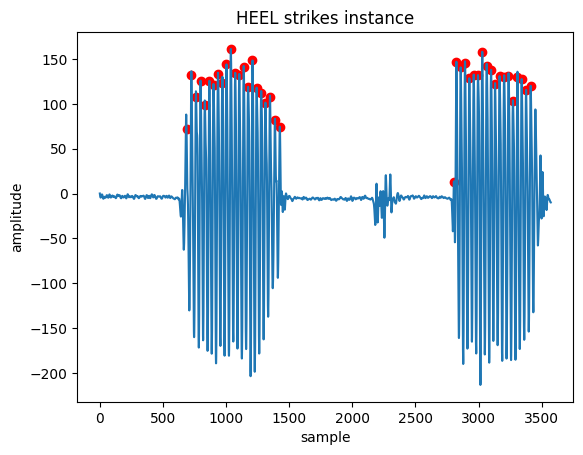

(41,)


In [ ]:

import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import filtfilt, find_peaks

#Load the acceleration data
data_acceleration = (imu_data)
data_acceleration2 = np.array(data_acceleration) - [1004, -4, -76]

acc_z = data_acceleration2[:, 0]

fs=101
from scipy.signal import filtfilt, firwin
from scipy import signal


fs = 101
#preprocessing the data
# Apply a low-pass filter
fc_low = 5 # Low-pass cutoff frequency (Hz)
b_low = firwin(20, fc_low/(fs/2), window='hamming')
a_low = 1.0
lowpass_acc = filtfilt(b_low, a_low, np.double(acc_z)) # Apply filter

# Apply a high-pass filter
fc = 1 # Cutoff frequency (Hz)
b = firwin(21, fc/(fs/2), window='hamming', pass_zero='highpass')
a = 1.0
filtered_acc_z = filtfilt(b, a, np.double(lowpass_acc)) # Apply filter

threshold = 0.3 * np.max(filtered_acc_z)

# find min
valleys, valley_locs = signal.find_peaks(-filtered_acc_z, height=threshold)
min_peak_location = valleys

heel_strike_locations = np.zeros(len(min_peak_location)-2, dtype=int)

for i in range(len(min_peak_location)-2):
    x = min_peak_location[i]
    y = min_peak_location[i+1]
    data_plot = acc_z[x:y]
    peak_index = np.argmax(data_plot)
    heel_strike_locations[i] =int(x + peak_index)

heel_strike_locations = heel_strike_locations.astype(int)
plt.plot(filtered_acc_z)
plt.scatter(heel_strike_locations, filtered_acc_z[heel_strike_locations], color='r')
plt.xlabel('sample')
plt.ylabel('amplitude')
plt.title('HEEL strikes instance')
plt.show()
print(heel_strike_locations.shape)


**LABLEING ACCLEROMETER DATA**

In [ ]:

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Training data
data1 = pd.DataFrame({'HS': np.zeros(3572)})
data1.loc[heel_strike_locations, 'HS'] = 1
imu_data = pd.DataFrame(imu_data)
data_2 = pd.concat([imu_data, data1], axis=1)
x = data_2.drop("HS", axis=1)
y = data_2["HS"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
adasyn = ADASYN(random_state=42)
x_train_oversampled, y_train_oversampled = adasyn.fit_resample(x_train, y_train)


near_miss_undersampler = NearMiss(version=1, n_neighbors=3)
x_train_combined_undersampled, y_train_combined_undersampled = near_miss_undersampler.fit_resample(x_train_oversampled, y_train_oversampled)





# Testing data
#data_test = pd.DataFrame({'HS': np.zeros(2359)})
#data_test.loc[heel_strike_test, 'HS'] = 1
#imu_data_test=pd.DataFrame(imu_data_test)
#data_test = pd.concat([imu_data_test, data_test], axis=1)
#x_test = data_test.drop("HS", axis=1)
#y_true = data_test["HS"].values


In [ ]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# Create an SVM model
svm = SVC(probability=True)

# Create an SVM model with the best hyperparameters
svm = SVC(C=30,  gamma= 0.001)

# Fit the SVM model to the combined under-sampled training data
svm.fit(x_train_combined_undersampled, y_train_combined_undersampled)

# Make predictions on the testing data
y_pred = svm.predict(x_test)

# Generate a classification report
classification_report = classification_report(y_test, y_pred)
print(classification_report)


              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1063
         1.0       0.18      0.56      0.27         9

    accuracy                           0.97      1072
   macro avg       0.59      0.77      0.63      1072
weighted avg       0.99      0.97      0.98      1072



In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create the logistic regression classifier with balanced class weights
logreg = LogisticRegression(class_weight='balanced')


# Train the classifier
logreg.fit(x_train_combined_undersampled, y_train_combined_undersampled)

# Make predictions on the testing data
y_pred = logreg.predict(x_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.9449626865671642
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      1063
         1.0       0.13      1.00      0.23         9

    accuracy                           0.94      1072
   macro avg       0.57      0.97      0.60      1072
weighted avg       0.99      0.94      0.97      1072



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Example value for n_neighbors

# Fit the model on the training data
knn.fit(x_train_combined_undersampled, y_train_combined_undersampled)

# Make predictions on the test set
y_pred = knn.predict(x_test)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9626865671641791
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1063
         1.0       0.17      0.89      0.29         9

    accuracy                           0.96      1072
   macro avg       0.58      0.93      0.63      1072
weighted avg       0.99      0.96      0.98      1072



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create a RandomForestClassifier with hyperparameters
rf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=5, min_samples_leaf=1,)

# Train the classifier
rf.fit(x_train_combined_undersampled, y_train_combined_undersampled)

# Make predictions on the test set
y_pred = rf.predict(x_test)

# Evaluate the predictions
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
accuracy = rf.score(x_test, y_test)
print("Accuracy of random forest on test set: ", accuracy)


              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1063
         1.0       0.12      0.78      0.20         9

    accuracy                           0.95      1072
   macro avg       0.56      0.86      0.59      1072
weighted avg       0.99      0.95      0.97      1072

Accuracy of random forest on test set:  0.9486940298507462


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Define the desired hyperparameters
learning_rate = 0.1
n_estimators = 100
max_depth = 3

# Create the Gradient Boosting Classifier with the specified hyperparameters
gb_classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,
                                           max_depth=3, random_state=42)

# Fit the classifier on the combined undersampled training data
gb_classifier.fit(x_train_combined_undersampled, y_train_combined_undersampled)

# Make predictions on the test data
y_pred = gb_classifier.predict(x_test)

# Evaluate the predictions
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print("Accuracy:", gb_classifier.score(x_test, y_test))


              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      1063
         1.0       0.18      0.67      0.28         9

    accuracy                           0.97      1072
   macro avg       0.59      0.82      0.63      1072
weighted avg       0.99      0.97      0.98      1072

Accuracy: 0.9710820895522388


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

# Define the desired hyperparameters
n_estimators = 100
learning_rate = 0.1

# Create the AdaBoost classifier with the specified hyperparameters
ada_classifier = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)

# Adjust the sample weights for the minority class
sample_weights = np.where(y_train_oversampled == 0, 1, 0.5)

# Fit the model with the adjusted sample weights
ada_classifier.fit(x_train_oversampled, y_train_oversampled, sample_weight=sample_weights)

# Make predictions on the test data
y_pred = ada_classifier.predict(x_test)

# Evaluate the predictions
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)
print("Accuracy:", ada_classifier.score(x_test, y_test))


              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      1063
         1.0       0.15      1.00      0.26         9

    accuracy                           0.95      1072
   macro avg       0.57      0.98      0.62      1072
weighted avg       0.99      0.95      0.97      1072

Accuracy: 0.9524253731343284


In [ ]:
import os
import joblib

# Create directory for results if it does not exist
if not os.path.exists('results'):
    os.makedirs('results')

# Create directory for models if it does not exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save all models as joblib files
joblib.dump(svm, 'models/svm_model.joblib')
joblib.dump(logreg, 'models/logreg_model.joblib')
joblib.dump(knn, 'models/best_knn_model.joblib')
joblib.dump(rf, 'models/rf_model.joblib')
joblib.dump(gb_classifier, 'models/gb_model.joblib')
joblib.dump(ada_classifier, 'models/ada_model.joblib')

print("Models saved successfully!")

Models saved successfully!


In [ ]:
models_list = [ logreg, knn, rf, gb_classifier,ada_classifier]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_models(models_list, x_train_oversampled, y_train_oversampled, x_test, y_test, file_path, print_console=False):
    with open(file_path, 'w') as f:
        for i, model in enumerate(models_list):
            model.fit(x_train_oversampled, y_train_oversampled)
            y_pred = model.predict(x_test)

            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)

            f.write(f'\t\tModel {i+1}: {model.__class__.__name__}\n')
            f.write(f'Accuracy: {accuracy:.4f}\n')
            f.write(f'Precision: {precision:.4f}\n')
            f.write(f'Recall: {recall:.4f}\n')
            f.write(f'F1 score: {f1:.4f}\n')

            f.write('Confusion Matrix:\n')
            f.write(f'{confusion_matrix(y_test, y_pred)}\n\n')

            f.write('Classification Report:\n')
            f.write(f'{classification_report(y_test, y_pred)}\n')
            f.write('_____________________________________________________________________\n')
            f.write('\n')

            if print_console:
                print(f'\t\tModel {i+1}: {model.__class__.__name__}')
                print(f'Accuracy: {accuracy:.4f}')
                print(f'Precision: {precision:.4f}')
                print(f'Recall: {recall:.4f}')
                print(f'F1 score: {f1:.4f}')

                print('Confusion Matrix:\n')
                print(f'{confusion_matrix(y_test, y_pred)}\n')

                print('Classification Report:\n')
                print(f'{classification_report(y_test, y_pred)}\n')
                print('_____________________________________________________________________\n')

    print(f'Evaluation metrics written to "{file_path}"')

# Define your x_train_combined_undersampled, y_train_combined_undersampled, x_test, and y_test variables here

models_list = [ logreg, knn, rf, gb_classifier,ada_classifier]
evaluate_models(models_list, x_train_combined_undersampled, y_train_combined_undersampled, x_test, y_test, 'results/evaluation_metrics.txt', print_console=True)


		Model 1: LogisticRegression
Accuracy: 0.9450
Precision: 0.1324
Recall: 1.0000
F1 score: 0.2338
Confusion Matrix:

[[1004   59]
 [   0    9]]

Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      1063
         1.0       0.13      1.00      0.23         9

    accuracy                           0.94      1072
   macro avg       0.57      0.97      0.60      1072
weighted avg       0.99      0.94      0.97      1072


_____________________________________________________________________

		Model 2: KNeighborsClassifier
Accuracy: 0.9627
Precision: 0.1702
Recall: 0.8889
F1 score: 0.2857
Confusion Matrix:

[[1024   39]
 [   1    8]]

Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1063
         1.0       0.17      0.89      0.29         9

    accuracy                           0.96      1072
   macro avg       0.58      0.93      0.63  

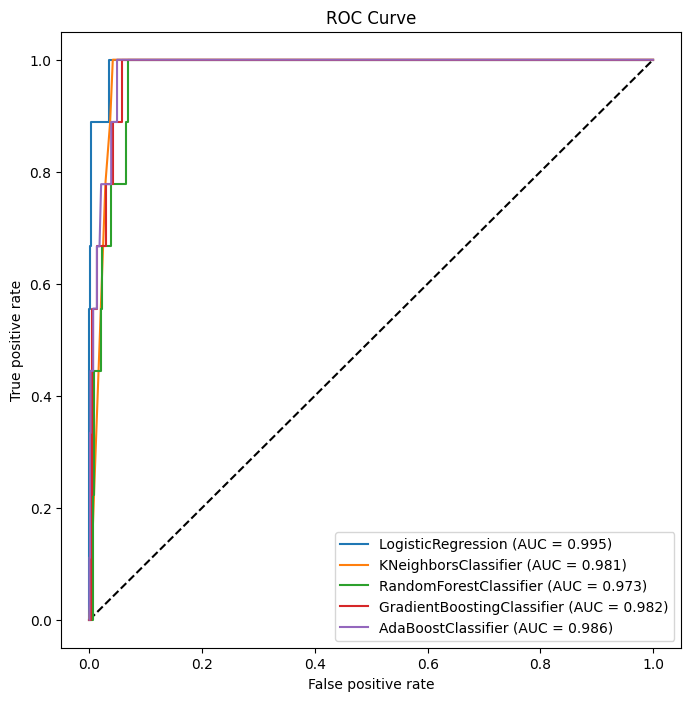

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curves(models_list, x_test, y_test):
    plt.figure(figsize=(8, 8))
    plt.plot([0, 1], [0, 1], 'k--')

    for model in models_list:
        y_pred_proba = model.predict_proba(x_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label='{} (AUC = {:.3f})'.format(model.__class__.__name__, auc_score))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # Save the figure to the 'results' folder
    plt.savefig('results/roc_curves.png', dpi=300, bbox_inches='tight')
    plt.show()

# Define your models_list, X_test, and y_test variables here
models_list = [ logreg, knn, rf, gb_classifier,ada_classifier]
plot_roc_curves(models_list, x_test, y_test)



**FINDING HEEL STRIKE LOCATION IN EEG**

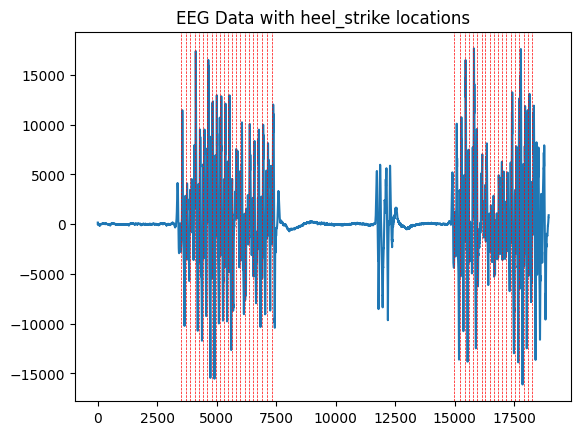

In [ ]:
from scipy.signal import resample
from scipy import signal




data_eeg_ch1 = resampled_data[:, 0]
value = imu_timestamps[heel_strike_locations]
time_stamp_eeg = np.linspace(1721934.70054064, 1721993.27054600, 18944)
data_stamps = time_stamp_eeg
index = np.zeros_like(value)

#finding the sample close to Heel_strike in EEG
for i in range(len(value)):
    idx = np.argmin(abs(data_stamps - value[i]))  # finding the nearest value to heel_strike stamps of EEG
    index[i] = idx

#plotting EEG
eeg_index=index.astype(int)
plt.plot(data_eeg_ch1)
plt.title('EEG Data with heel_strike locations')

for i in range(len(eeg_index)):
    plt.axvline(eeg_index[i], color='r', linestyle='--', linewidth=0.5)

plt.show()





**Labeling EEG data (HEEL-STRIKE-LOCATIONS)**

In [ ]:
#traning data
eeg_data1 = pd.DataFrame({'HS': np.zeros(18944)})
eeg_data1.loc[eeg_index.flatten(), 'HS'] = 1  # Use flatten() to convert eeg_index to 1D array
resampled_data_df = pd.DataFrame(resampled_data)
eeg_data2 = pd.concat([resampled_data_df, eeg_data1], axis=1)
df = pd.DataFrame(eeg_data2)
x_eeg = df.drop(["HS"], axis=1)  # x_train
y_eeg = df["HS"].values  # y_train
x_eeg_train, x_eeg_test, y_eeg_train, y_eeg_test = train_test_split(x_eeg, y_eeg, test_size=0.5, random_state=1)
adasyn = ADASYN()
x_train_oversampled, y_train_oversampled = adasyn.fit_resample(x_eeg_train, y_eeg_train)

near_miss_undersampler = NearMiss(version=1, n_neighbors=3)
x_train_combined_undersampled, y_train_combined_undersampled = near_miss_undersampler.fit_resample(x_train_oversampled, y_train_oversampled)

class_counts = pd.Series(y_eeg_test).value_counts()
print(class_counts)











0.0    9453
1.0      19
dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100],
    'max_depth': [ 10],
    'min_samples_split': [10],
    'min_samples_leaf': [4],
    'class_weight': [ {0: 1, 1: 10}]  # Adjust the class weights here
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(x_train_combined_undersampled, y_train_combined_undersampled)

# Get the best model with the tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(x_eeg_test)

# Evaluate the predictions
classification_rep = classification_report(y_eeg_test, y_pred)
print(classification_rep)
print("Accuracy:", best_model.score(x_eeg_test, y_eeg_test))


              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90      9453
         1.0       0.01      0.84      0.02        19

    accuracy                           0.81      9472
   macro avg       0.50      0.83      0.46      9472
weighted avg       1.00      0.81      0.89      9472

Accuracy: 0.8129222972972973


**CLassification**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
param_grid = {
    'learning_rate': [0.1],
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_split': [2],
    'min_samples_leaf': [ 3]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(x_train_combined_undersampled, y_train_combined_undersampled)

best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Make predictions on the test data
y_pred = best_model.predict(x_eeg_test)

# Evaluate the predictions
classification_rep = classification_report(y_eeg_test, y_pred)
print(classification_rep)
print("Accuracy:", best_model.score(x_eeg_test, y_eeg_test))



Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      9453
         1.0       0.02      0.37      0.04        19

    accuracy                           0.96      9472
   macro avg       0.51      0.67      0.51      9472
weighted avg       1.00      0.96      0.98      9472

Accuracy: 0.9632601351351351


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create the AdaBoost Classifier
ada_classifier = AdaBoostClassifier(random_state=42)
param_grid = {
    'n_estimators': [50],
    'learning_rate': [0.1]
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(ada_classifier, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(x_train_combined_undersampled, y_train_combined_undersampled)

# Get the best model with the tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(x_eeg_test)

# Evaluate the predictions
classification_rep = classification_report(y_eeg_test, y_pred)
print(classification_rep)
print("Accuracy:", best_model.score(x_eeg_test, y_eeg_test))


              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      9453
         1.0       0.02      0.58      0.03        19

    accuracy                           0.93      9472
   macro avg       0.51      0.75      0.50      9472
weighted avg       1.00      0.93      0.96      9472

Accuracy: 0.9295819256756757


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create the XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
param_grid = {
    'n_estimators': [100],
    'learning_rate': [0.1],
    'max_depth': [3],
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(x_train_combined_undersampled, y_train_combined_undersampled)

# Get the best model with the tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(x_eeg_test)

# Evaluate the predictions
classification_rep = classification_report(y_eeg_test, y_pred)
print(classification_rep)
print("Accuracy:", best_model.score(x_eeg_test, y_eeg_test))


              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      9453
         1.0       0.02      0.37      0.04        19

    accuracy                           0.96      9472
   macro avg       0.51      0.66      0.51      9472
weighted avg       1.00      0.96      0.98      9472

Accuracy: 0.9595650337837838


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Create the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [4],
    'class_weight': [ {0: 1, 1: 10}]  # Adjust the class weights here
}

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='f1_macro')
grid_search.fit(x_train_combined_undersampled, y_train_combined_undersampled)

# Get the best model with the tuned hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(x_eeg_test)

# Evaluate the predictions
classification_rep = classification_report(y_eeg_test, y_pred)
print(classification_rep)
print("Accuracy:", best_model.score(x_eeg_test, y_eeg_test))


              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93      9453
         1.0       0.01      0.84      0.03        19

    accuracy                           0.87      9472
   macro avg       0.51      0.86      0.48      9472
weighted avg       1.00      0.87      0.93      9472

Accuracy: 0.8706714527027027


In [ ]:
import os
import joblib

# Create directory for results if it does not exist
if not os.path.exists('results'):
    os.makedirs('results')

# Create directory for models if it does not exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save all models as joblib files
joblib.dump(rf_classifier, 'models/rf_model.joblib')
joblib.dump(gb_classifier, 'models/gb_model.joblib')
joblib.dump(ada_classifier, 'models/ada_model.joblib')
joblib.dump(xgb_classifier, 'models/xgb_model.joblib')
joblib.dump(dt_classifier, 'models/dt_model.joblib')

print("Models saved successfully!")


Models saved successfully!


In [ ]:
models_list = [rf_classifier, gb_classifier, ada_classifier, xgb_classifier, dt_classifier]
for model in models_list:
    model.fit(x_train_combined_undersampled, y_train_combined_undersampled)

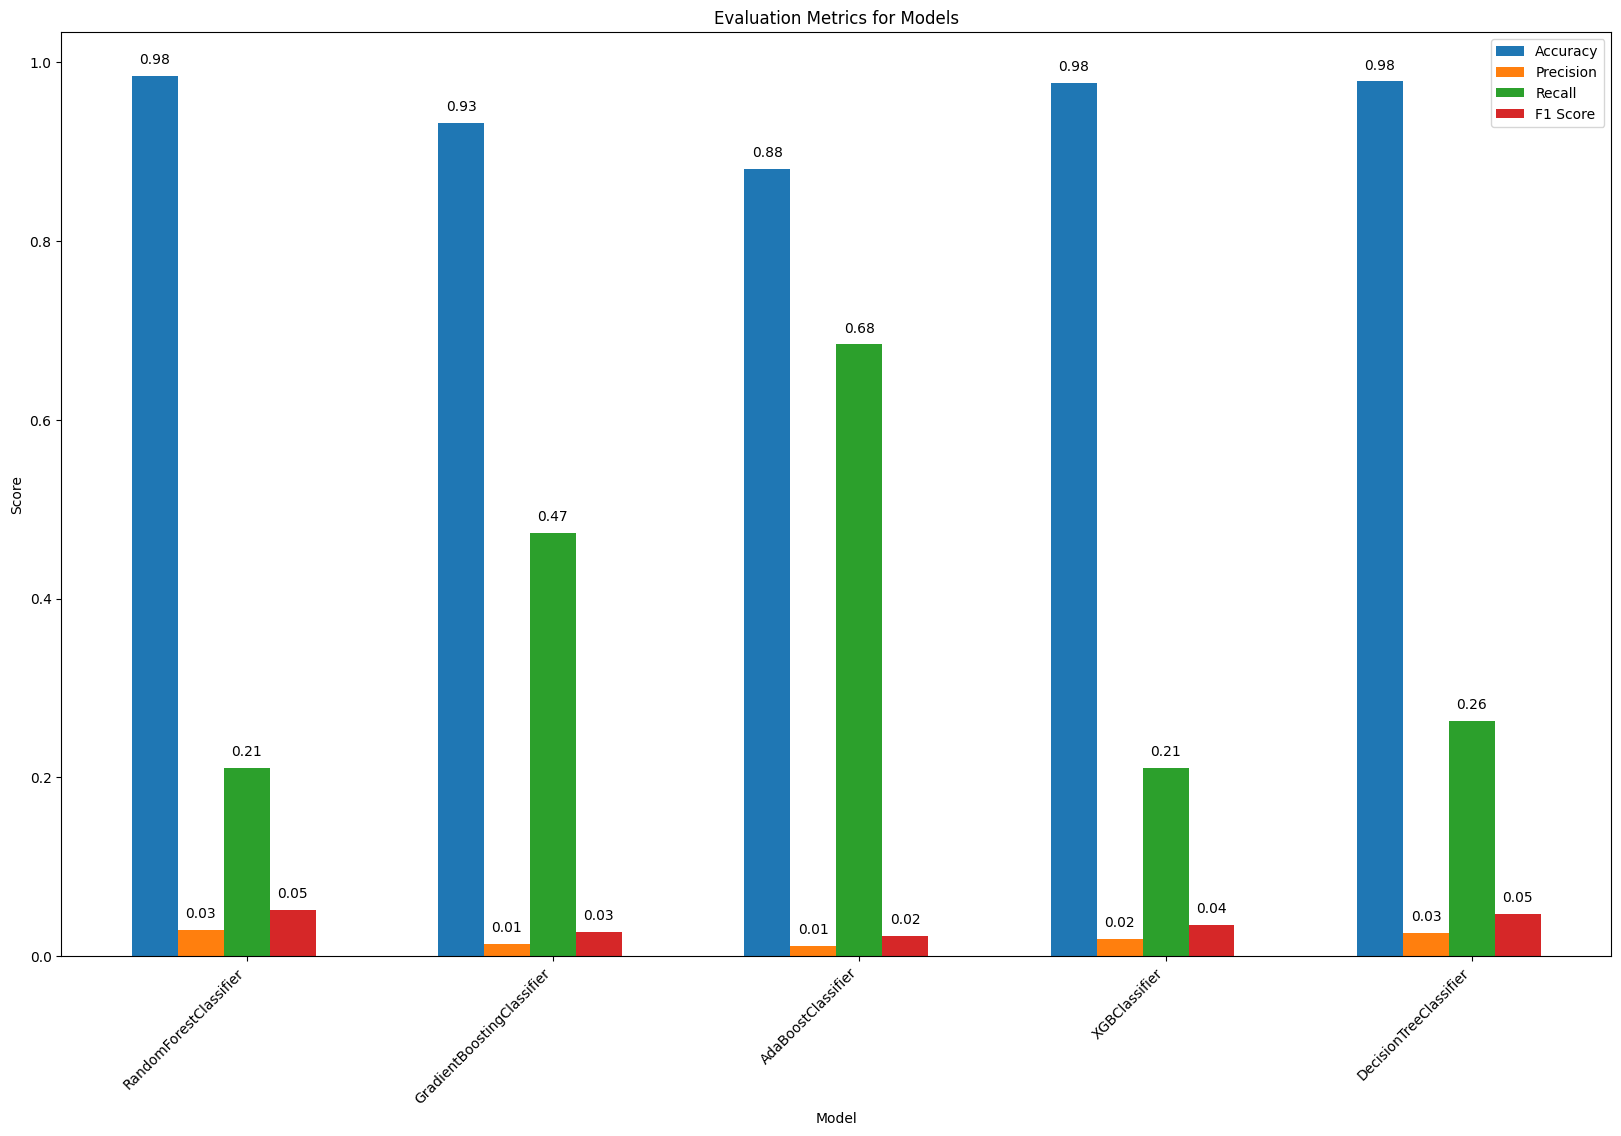

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def plot_evaluation_metrics(models_list, x_eeg_test, y_eeg_test):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for model in models_list:
        y_pred = model.predict(x_eeg_test)

        accuracy = accuracy_score(y_eeg_test, y_pred)
        precision = precision_score(y_eeg_test, y_pred)
        recall = recall_score(y_eeg_test, y_pred)
        f1 = f1_score(y_eeg_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Create a bar chart of the evaluation metrics for each model
    x_pos = np.arange(len(models_list))
    width = 0.15

    fig, ax = plt.subplots(figsize=(20, 12))

    ax.bar(x_pos - 2*width, accuracy_scores, width, label='Accuracy')
    ax.bar(x_pos - width, precision_scores, width, label='Precision')
    ax.bar(x_pos, recall_scores, width, label='Recall')
    ax.bar(x_pos + width, f1_scores, width, label='F1 Score')

    # Add the metric values above each bar
    for i in range(len(models_list)):
        ax.text(x_pos[i] - 2*width, accuracy_scores[i] + 0.01, f'{accuracy_scores[i]:.2f}', rotation=0, ha='center', va='bottom')
        ax.text(x_pos[i] - width, precision_scores[i] + 0.01, f'{precision_scores[i]:.2f}', rotation=0, ha='center', va='bottom')
        ax.text(x_pos[i], recall_scores[i] + 0.01, f'{recall_scores[i]:.2f}', rotation=0, ha='center', va='bottom')
        ax.text(x_pos[i] + width, f1_scores[i] + 0.01, f'{f1_scores[i]:.2f}', rotation=0, ha='center', va='bottom')

    ax.set_xticks(x_pos)
    ax.set_xticklabels([model.__class__.__name__ for model in models_list], rotation=45, ha='right')
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.set_title('Evaluation Metrics for Models')
    ax.legend()
    # Save the figure to the 'results' folder
    plt.savefig('results/performance_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()


plot_evaluation_metrics(models_list, x_eeg_test, y_eeg_test)


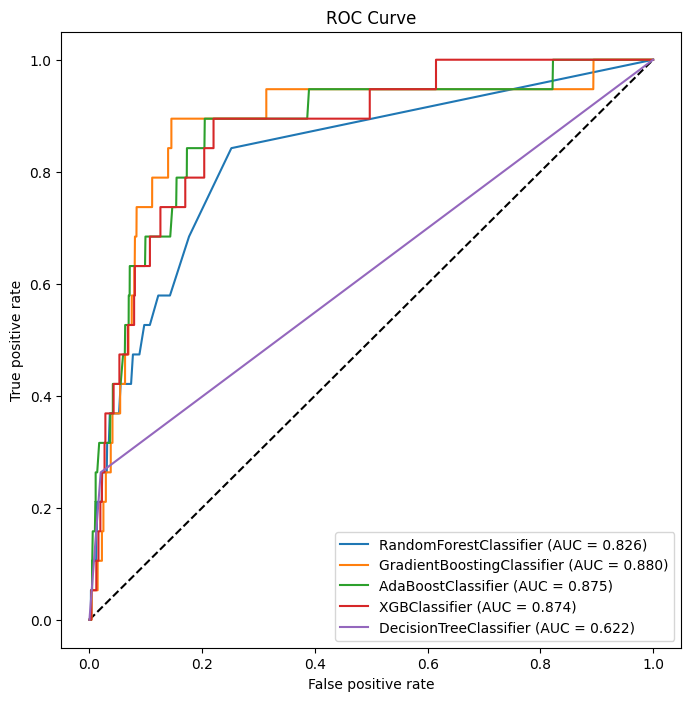

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curves(models_list, x_eeg_test,y_eeg_test):

    plt.figure(figsize=(8,8))
    plt.plot([0, 1], [0, 1], 'k--')

    for model in models_list:
        y_pred_proba = model.predict_proba(x_eeg_test)[:,1]
        fpr, tpr, _ = roc_curve(y_eeg_test, y_pred_proba)
        auc_score = roc_auc_score(y_eeg_test, y_pred_proba)
        plt.plot(fpr, tpr, label='{} (AUC = {:.3f})'.format(model.__class__.__name__, auc_score))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # Save the figure to the 'results' folder
    plt.savefig('results/roc_curves.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_roc_curves(models_list, x_eeg_test, y_eeg_test)